In [226]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

In [227]:
#Reading in the data
data = pd.read_csv('./Desktop/Titanic/train.csv')

In [228]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [230]:
#Fill in median because it is more resistant to outliers than mean
data['Age'].fillna(data['Age'].median(), inplace=True)

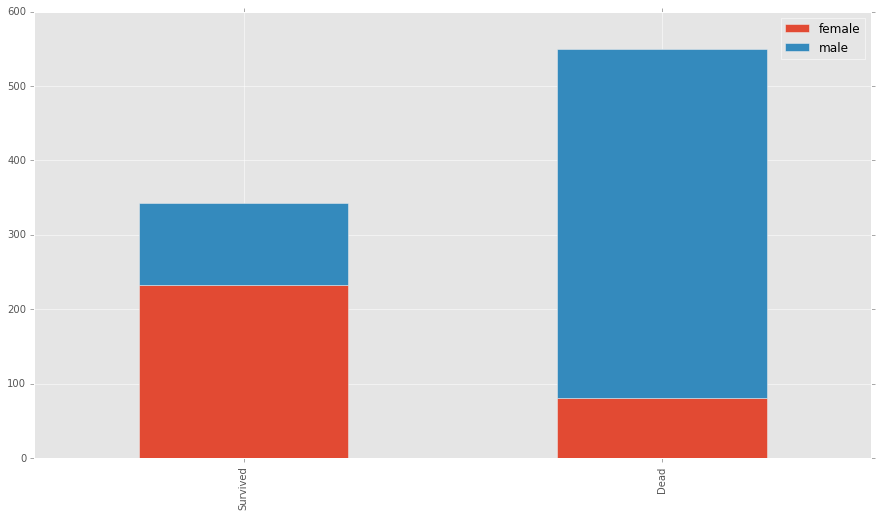

In [231]:
#A look at the obvious possible relationships
survived_gender = data[data['Survived'] == 1]['Sex'].value_counts()
dead_gender = data[data['Survived'] == 0]['Sex'].value_counts()
df = pd.DataFrame([survived_gender, dead_gender])
df.index = ['Survived','Dead']
df.plot(kind ='bar',stacked =True, figsize=(15,8))

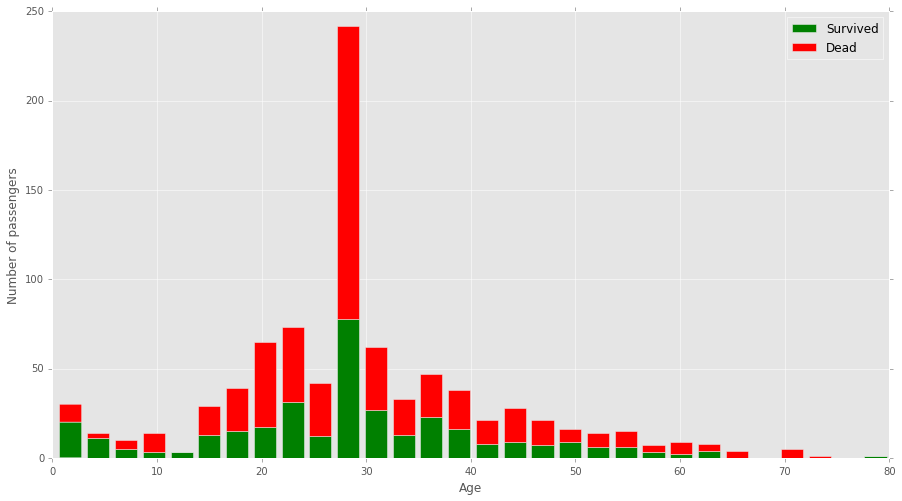

In [232]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], stacked=True, color = ['g','r'], bins =30, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()              

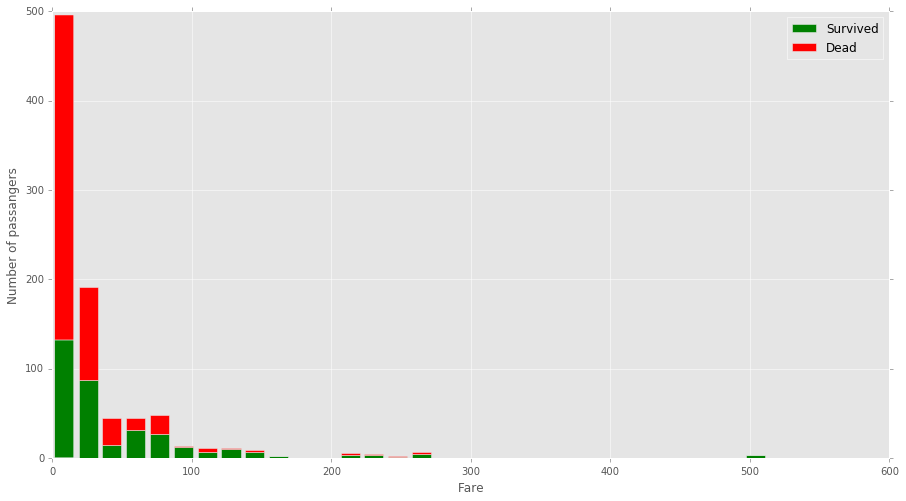

In [233]:
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Fare'], data[data['Survived']==0]['Fare']],
        stacked=True, color = ['g','r'], bins = 30, label = ['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passangers')
plt.legend()

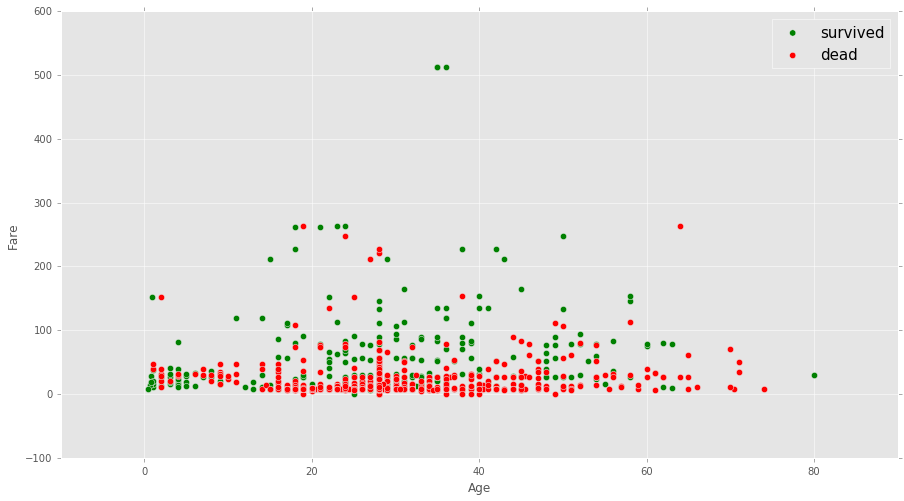

In [234]:
#Observing how many died based off fair and age
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'],
          c='green',s=40)
ax.scatter(data[data['Survived']==0]['Age'], data[data['Survived']==0]['Fare'],
          c='red', s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived', 'dead'), scatterpoints=1, loc = 'upper right',
         fontsize = 15,)

In [235]:
def status(feature):
    print('Processing', feature)

In [236]:
def get_combined_data():
    #read train set
    train = pd.read_csv('./Desktop/Titanic/train.csv')
    
    #read test set
    test = pd.read_csv('./Desktop/Titanic/test.csv')
    
    #cleaning step
    targets = train.Survived
    train.drop('Survived',1,inplace=True)
    
    #merging sets
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index',inplace=True,axis=1)
    
    return combined
    

In [237]:
combined = get_combined_data()

In [238]:
combined.shape

(1309, 11)

In [239]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [240]:
#Function that creates a new Title feature that stores that particular passenger's title

def get_titles():
    global combined
    
    #extract the title
    combined['Title'] = combined['Name'].map(lambda name:
                  name.split(',')[1].split('.')[0].strip())
        # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    combined['Title'] = combined.Title.map(Title_Dictionary)

In [241]:
get_titles()

In [242]:
combined.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [243]:
# There are many missing ages, so to fill them in we can use the average ages
# for each title
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return 30
            elif row['Title'] == 'Mrs':
                return 45
            elif row['Title'] == 'Officer':
                return 49
            elif row['Title'] == 'Royalty':
                return 39

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return 20
            elif row['Title'] == 'Mrs':
                return 30

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return 18
            elif row['Title'] == 'Mrs':
                return 31

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 41.5
            elif row['Title'] == 'Officer':
                return 52
            elif row['Title'] == 'Royalty':
                return 40

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return 2
            elif row['Title'] == 'Mr':
                return 30
            elif row['Title'] == 'Officer':
                return 41.5

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return 6
            elif row['Title'] == 'Mr':
                return 26
    
    combined.Age = combined.apply(lambda r : fillAges(r) if np.isnan(r['Age']) else r['Age'], axis=1)
    
    status('age')

In [244]:
process_age()

Processing age


In [245]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [246]:
# This function delets the Name feature, because we don't have anything more
# to learn form it, then creates a feature Title_X to store title information
def process_names():
    global combined
    #clean names
    combined.drop('Name',axis=1,inplace=True)
    
    #encoding the dummy variable
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined,titles_dummies],axis=1)
    
    #removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    status('names')

In [247]:
process_names()

Processing names


In [248]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,0.0,1.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,female,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,0.0,1.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,0.0


In [249]:
def process_fares():
    global combined
    #replace missing fare with the mean
    combined.Fare.fillna(combined.Fare.mean(),inplace=True)
    status('fare')

In [250]:
process_fares()

Processing fare


In [251]:
def process_embarked():
    global combined
    #two missing values, fill with most common
    combined.Embarked.fillna('S', inplace=True)
    
    #dummy encoding
    embarked_dummies = pd.get_dummies(combined['Embarked'],
                                     prefix='Embarked')
    combined = pd.concat([combined,embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)
    
    status('embarked')

In [252]:
process_embarked()

Processing embarked


In [253]:
def process_cabin():
    global combined
    
    #replacing missing cabins with U(for unknown)
    combined.Cabin.fillna('U',inplace=True)
    
    #mapping each cabin value with the cabin letter
    combined['Cabin'] = combined['Cabin'].map(lambda c:c[0])
    
    #dummy encoding
    cabin_dummies = pd.get_dummies(combined['Cabin'],prefix='Cabin')
    
    combined = pd.concat([combined, cabin_dummies],axis=1)
    
    combined.drop('Cabin', axis=1,inplace=True)
    status('cabin')

In [254]:
process_cabin()

Processing cabin


In [255]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null float64
Title_Miss       1309 non-null float64
Title_Mr         1309 non-null float64
Title_Mrs        1309 non-null float64
Title_Officer    1309 non-null float64
Title_Royalty    1309 non-null float64
Embarked_C       1309 non-null float64
Embarked_Q       1309 non-null float64
Embarked_S       1309 non-null float64
Cabin_A          1309 non-null float64
Cabin_B          1309 non-null float64
Cabin_C          1309 non-null float64
Cabin_D          1309 non-null float64
Cabin_E          1309 non-null float64
Cabin_F          1309 non-null float64
Cabin_

In [256]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,female,38.0,1,0,PC 17599,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,female,35.0,1,0,113803,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,3,male,35.0,0,0,373450,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [257]:
def process_sex():
    global combined
    #map string to numeric
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    status('sex')

In [258]:
process_sex()

Processing sex


In [259]:
def process_pclass():
    global combined
    #encoding into 3 categories:
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    
    #adding dummy variables
    combined = pd.concat([combined,pclass_dummies],axis=1)
    
    #remove Pclass
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('pclass')

In [260]:
process_pclass()

Processing pclass


In [261]:
def process_ticket():
    
    global combined
    
    # a function that extracts each prefix of the 
    #ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
    def cleanTicket(ticket):
        ticket = ticket.replace('.','')
        ticket = ticket.replace('/','')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip() , ticket)
        ticket = filter(lambda t : not t.isdigit(), ticket)
        if 1 > 0:
            return next(ticket, 'XXX')
        else: 
            return 'XXX'
    

    # Extracting dummy variables from tickets:

    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket',inplace=True,axis=1)

    status('ticket')

In [262]:
process_ticket()

Processing ticket


In [263]:
def process_family():
    
    global combined
    # introducing a new feature : the size of families (including the passenger)
    combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
    # introducing other features based on the family size
    combined['Singleton'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s : 1 if 5<=s else 0)
    
    status('family')

In [264]:
process_family()

Processing family


In [265]:
combined.shape

(1309, 68)

In [266]:
combined.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
1,2,0,38.0,1,0,71.2833,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0,1,0
2,3,0,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0
3,4,0,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,0,1,0
4,5,1,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0


In [267]:
def scale_features():
    global combined
    
    features = list(combined.columns)
    combined[features] = combined[features].apply(lambda x: x/x.max(),
                                                 axis=0)
    print('Features scaled!')

In [268]:
scale_features()

Features scaled!


In [269]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [270]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf,X,y, cv=5,scoring=scoring)
    return np.mean(xval)

In [271]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('./Desktop/Titanic/train.csv')
    targets = train0.Survived
    train = combined.ix[0:890]
    test = combined.ix[891:]
    
    return train,test,targets

In [272]:
train,test,targets = recover_train_test_target()

In [273]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train, targets)

In [274]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_

In [275]:
#Illustrating the most important features
features.sort(['importance'],ascending=False)

,feature,importance
0,PassengerId,0.128787
2,Age,0.118606
8,Title_Mr,0.115783
5,Fare,0.115120
1,Sex,0.103814
7,Title_Miss,0.041846
26,Pclass_3,0.034348
9,Title_Mrs,0.032985
23,Cabin_U,0.028200
24,Pclass_1,0.023377


In [276]:
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train)
train_new.shape

(891, 15)

In [277]:
test_new = model.transform(test)
test_new.shape

(418, 15)

In [278]:
#Creating the random forest and scoring the accurary of the model
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
    'max_depth' : [4,5,6,7,8],
    'n_estimators': [200,210,240,250],
    'criterion' : ['gini', 'entropy']
}

cross_validation = StratifiedKFold(targets, n_folds=5)
grid_search = GridSearchCV(forest, param_grid=parameter_grid,
                          cv=cross_validation)
grid_search.fit(train_new,targets)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8316498316498316
Best parameters: {'max_depth': 5, 'n_estimators': 240, 'criterion': 'gini'}


In [279]:
#Output file to observe predictions
output = grid_search.predict(test_new).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = test['PassengerId']
df_output['Survived'] = output
df_output[['PassengerId', 'Survived']].to_csv('./Desktop/Titanic/output.csv')